---
title: "Julia Plots Test"
format:
  html:
    code-fold: false
jupyter: julia-data-science
execute: 
  enabled: false
---

## Plots

In [1]:
using Plots

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


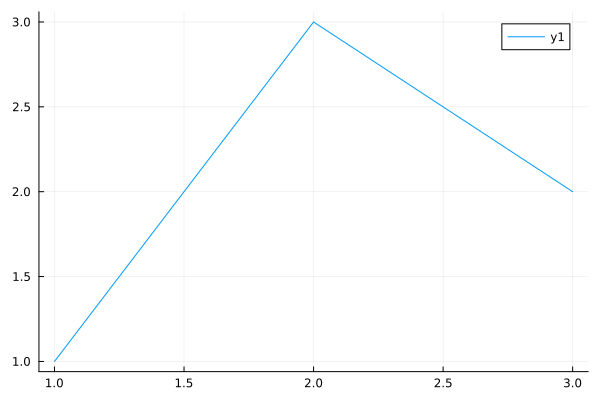

In [2]:
display(plot([1,3,2]))

## Makie
- https://docs.makie.org/stable/tutorials/basic-tutorial/

In [3]:
using GLMakie # All functionality is defined in Makie and every backend re-exports Makie

Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.01
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x)
    dy = l.x * (l.ρ - l.z) - l.y
    dz = l.x * l.y - l.β * l.z
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
    Point3f(l.x, l.y, l.z)
end

attractor = Lorenz()

points = Observable(Point3f[]) # Signal that can be used to update plots efficiently
colors = Observable(Int[])

set_theme!(theme_black())

fig, ax, l = lines(points, color = colors,
    colormap = :inferno, transparency = true, 
    axis = (; type = Axis3, protrusions = (0, 0, 0, 0), 
              viewmode = :fit, limits = (-30, 30, -30, 30, 0, 50)))

record(fig, "lorenz.mp4", 1:120) do frame
    for i in 1:50
        # update arrays inplace
        push!(points[], step!(attractor))
        push!(colors[], frame)
    end
    ax.azimuth[] = 1.7pi + 0.3 * sin(2pi * frame / 120) # set the view angle of the axis
    notify(points); notify(colors) # tell points and colors that their value has been updated
    l.colorrange = (0, frame) # update plot attribute directly
end

[ Info: Precompiling GeometryBasicsExt [b238bd29-021f-5edc-8b0e-16b9cda5f63a]
[ Info: Precompiling FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c]


"lorenz.mp4"

In [5]:
using Base64

function display_mp4(filename)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",
    Base64.base64encode(open(read,filename)),"""" type="video/mp4"></video>"""))
end

display_mp4 (generic function with 1 method)

In [6]:
display_mp4("lorenz.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAHVu1tZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xNCBsb29rYWhlYWRfdGhyZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjQgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAADGSZYiEAC///vdOvwKbVMIqA5JXCvbKpCZZuVJrAfKmAAADAAADAABeyGxk66ZkFb3ErDAAAAg4AUMKmIvauDoMyUX9AJZj5Lo7lDqBuxbBZzM9focxRPxzw2g/2SwwhGqB3Aglw3QATQcD4M46xfvbvuUpfKrUpSmoWgAleZ+w14e/cgDiof6rMOOBQ7LSmccqRmbyRxJg93GW8Yyv+m6iGsmcI4ZCFa8eN2A3lAWEHUutJNHOBcRL4pXZ2kOuq56V9UFDVOAXq7x9n6pIQEgthgO/fLlQf0xlqf5euEN8v43/JUVFvKj/lnHqB3Wg7NlOF5SHi2ouzr2yfNynRXRkgTfloK0J+IuRctG/FXKMLbqS05BVXDKRP6L6ADTP6AlbrXmBDjIOWMPSCCQblHOJfK7mDUFIKj+npPWGMEir+/hhv84zL3XkprbEMH4BzDj+LHxWDNuMtDyVElFtuji4qZwObDJRiRyOEmkFpQo2VDifXeu+6xNTxIosFy3Hor/1LY0+3GLgurYghNEMCB3G/ThkvIk7rDsyMF/Yye3UKu84+4FvdEOtZvAwmEAUIITH40mpPRgmmVTVtO+MrXMqN8ttCxfarFNmuHBf6YNEUUBUv57fXneP/Mfh40dgZdsk6B7315KEgMUu4TfSTCG2IelT/alDkS6NJAggUsDI3yz7yupv9F1WagWQzQG5c0Me6+rxHVHnbRVlnCHrgB+37pb2CoIAlwJTsGTjj6PooRN2CemVbpQumNHSJ/jzXj8gmtlVPeK06YREeZxzPo5B4yaPaPHopddd9+V9wWlKHC6oTZT0ttJt309DkM3WV71dWoy+mTjStyz3aV9GuPdrcZZHzj3WiD/XegCZtt1641bPygudzy/dWLakGcUoDOVSGjOyunLOLW/tuVVFSb/qCbpQMe3nXocQVhXWs15BTr8C+A90VqNHqi2h6JOu/BLT/wC5eG9F2//RvzaVoWql5sxaf5aG6nFgt/SDNZkDOyCiXihErVqjNu7qq2nRqNppKPvowOW0VEW9OQb9izOsRUpF7z+aKUNDW1avnKpxxcRW4Di/eDkYE+moH8IFraAoVBc/p2/+rHoC1b5dCIrj+HnDjIH+iij1+ldkCs8ljgTwPruSZ2C2BK95+Q4WsF4t7dXZ/otle8ps0uVKArPOoP4uVXe13Ki8+HtTTeF6EGHw0/UJ0V9dCdKSH1jUH6jP/AsQr1dun/6GO9hjiR3qLffLkHWi7l0NZlFd60gAZ40GM7HxBYSOD/QTbvC5F6Z7S2aGB9wt/zWV5GvROdC66rLQMxUtU1VeM7lHlp2fx3iuAevksJceylu6XLK+zbgkyUiT7TC6x4LCcZIjJv/o0SV17iYwjPv0+YYzpIjdFRjYwkUkE9vt9E5MgIU2caolNZWN3ZIkfIERq9/QDRPYPbWrdgNRzet1J0PAA81VGduYJYNNXfQsg1Qig+qTJIOW0LXgJg1esPWuM0ZGdajyO4b5PN2Kfk966o6TY6fzm+RgG5B3O0eG/5Z+o3L7kUZEFVfcdaNwY1JvR848xvyQsR242MF4rPOUlmTr521NNG5wR+pjVRQ3BrJjyITU2hzW8/kwJsUaG9+r63SXjUV/spJQCRiP2/ZALWSA0Qw8GQdx737Wd1VGHGNwq6md9EpuDTPDEops/fCOjkV51++bwLdYVAdkHXkqbpfreMSQpe+Q84QqOfTr5y+26gfsTAkjz2aFe8uzKC4WYZcHRvyguZQHf4u47REzhIomNHojYQQmJGbNCykdTSD0VpfOJ8S6fT3OGD/ksw0BGnPH/+rGSS/FEZhZb8gg7deJnB/1CTO4r3tYFv44IMAGtmCJv9hpH4H9bw9gsiAMNZ6U3oTCw9Bw3YJiNnIgjz5fkkNnZLlKp5e9rvbd+Vd/Lny3mnTqJ6AU6KZn/KW4kELgWFe7Fy7MNJSFn3rc/HVCvOBiSjELwm3cRWvCEitZ7qlnuTuQv/xpJbyIFf5Vo3H56nr+wbLcxhNQF1I2Uoyckk99jZdJdlUt7CoKmlhmsYa7JbnpdLbBONtDQS+tj96YzRTps32KpfrktlNdx6UdMyprMIzubBtLkohiUbwA0hjA+I4ClRCH+qlDyotrWUloTQXRAAPH8bCKggHqlsxrXQ98ISEhIgr3rAp1PAvNd3Ahw3XwBPmZI7/Dw4P/JkDSimmRL4PWPYfyX+RCrHN/MXdFl+87ljwxBNLD2gfw0QaF4iqJxNvHdgNSRvg48O4rNzSmmhwd12aahPkRY/BHex9s1kmQbFRj3pP//v+Yt1bYOQ04ZQisnNM/bkJSJmHa0K0XLnezRgO8DXCMdgh0UesBb6sjYmoDP2/lsr5ChonzDVGv0I1RkKC3vFIDFTvYRSfP/+zA4YZ7EOLr+a0vKmq5G4kmkE/S6Ogv59dG2fHKgnaihmREU88LIb9fHX9GML+QU0IAAiSx6N7N9qskWRsLvMAq9KLa4SP/EOqb5Gl13pscyexsB3VrTwXi1j0jHpLzj8FjB5tA6zbbvOYICEYjgEIamMmtVuxZYqf9wtDFvuOyshcDnxegk9rmXvQIrAYnAV9so8aeDt3O5bPLvlcUK+ihydYshu+d4ywDCX1AE935Pw7xhfm+AvuvfC5yjbPgvcWY4J7S3EdgiAy4hAZdJX8WsBDW4ZyqIyBiKDYq3pp4Q/Ijddgq5xd8wdvGAvqUpK19+VnhLH4WcO7VrqIiTGSmgqiLRr0PATW0eUnwzd0tUY6ItXQvgOPMfzZVl81BLkhbGc7Dc0vbin1EvBB5LoZauRnJvTttrpKxbIH7Bngq8j988Aj+6SKwppzVqWNIilEPBhqTVRtJ3xJsXepnxC97DCt3aj+bTPFNScn9KaV5H5cgU5GaoF2Y/DLPWg66Ln6cllHwMTXeV9MIoUxKAZ2682Q0GK4omhtfv0423UD4Pv7yRvTdIdxcrZvpwPtiuTcO7g13IHbanJaT3nouNDJ7gxd

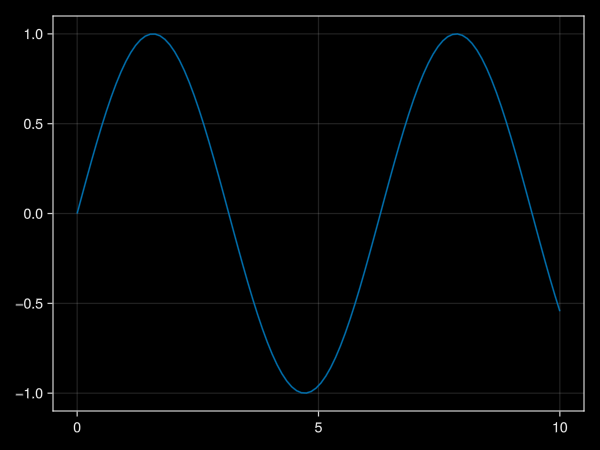

In [4]:
f = Figure()
ax = Axis(f[1, 1])
x = range(0, 10, length=100)
y = sin.(x)
lines!(ax, x, y)
f